# Introduction to Synthetic Aperture Radar Using Python and MATLAB 

## by Andy Harrison - © 2022 Artech House

---

## Example 3.4.7 Backprojection Algorithm - Point Targets

---

**Import Modules**

In [1]:
%matplotlib inline

import numpy as np

from scipy.constants import speed_of_light, pi

import backprojection as bp

from matplotlib import pyplot as plt

**Set the range to the image center (m)**

In [2]:
range_center = 1000

**Set the point target locations (m) and RCS (m<sup>2</sup>)**

In [3]:
x_target = [3, 0, -3]

y_target = [-3, 0, 3]

rcs = [10, 10, 20]

**Set the image span (m)**

In [4]:
x_span = 20

y_span = 20

**Set the number of bins in the image**

In [5]:
nx = 500 # Number of bins in x-direction

ny = 500 # Number of bins in y-direction

**Set the start frequency and bandwidth (Hz)**

In [6]:
start_frequency = 5e9 

bandwidth = 300e6 

**Set the azimuth span of the synthetic apreture (deg)**

In [7]:
az_start = -3

az_end = 3

**Set the window type for the image**

In [8]:
window_type = 'Hanning'

**Set the dynamic range for the image plot (dB)**

In [9]:
dynamic_range = 50

**Set up the azimuth space**

In [10]:
r = np.sqrt(x_span**2 + y_span**2)

da = speed_of_light / (2.0 * r * start_frequency)

na = round((az_end - az_start) / da)

az = np.linspace(az_start, az_end, int(na))

**Set up the frequency space**

In [11]:
df = speed_of_light / (2.0 * r)

nf = np.floor(bandwidth / df)

frequency = np.linspace(start_frequency, start_frequency + bandwidth, int(nf))

**Set the length of the FFT**

In [12]:
fft_length = int(8 * 2**np.ceil(np.log2(nf)))

**Set up the aperture positions**

In [13]:
sensor_x = range_center * np.cos(np.radians(az))

sensor_y = range_center * np.sin(np.radians(az))

sensor_z = np.zeros_like(sensor_x)

**Set up the image space**

In [14]:
xi = np.linspace(-0.5 * x_span, 0.5 * x_span, nx)

yi = np.linspace(-0.5 * y_span, 0.5 * y_span, ny)

[x_image, y_image] =np. meshgrid(xi, yi)

z_image = np.zeros_like(x_image)

**Calculate the signal in wavenumber space**

In [15]:
# Initialize the signal

signal = np.zeros((int(nf), int(na)), dtype=complex)


# Short hand and helps with computational load

ca = np.cos(np.radians(az))

sa = np.sin(np.radians(az))


# Calculate the wavenumber (rad/m)

kc = 2 * pi * frequency / speed_of_light


# Loop over all azimuth angles
i = 0
for a, c, s in zip(az, ca, sa):
    
    r_los = [c, s]
    
    for xt, yt, rt in zip(x_target, y_target, rcs):
    
        r_target = np.dot(r_los, [xt, yt])
        
        signal[:, i] += rt * np.exp(1j * 2.0 * kc * r_target)
        
    i += 1

**Get the window coefficients**

In [16]:
if window_type == 'Hanning':
    
    coefficients = np.outer(np.hanning(nf), np.hanning(na))
    
elif window_type == 'Hamming':
    
    coefficients = np.outer(np.hamming(nf), np.hamming(na))
    
else:
    
    coefficients = np.ones_like(signal)

**Apply the selected window**

In [17]:
signal = signal * coefficients

**Reconstruct the image**

In [18]:
bp_image = bp.reconstruct(signal, sensor_x, sensor_y, sensor_z, range_center, x_image, y_image, z_image, frequency, fft_length)

**Plot the backprojected image**

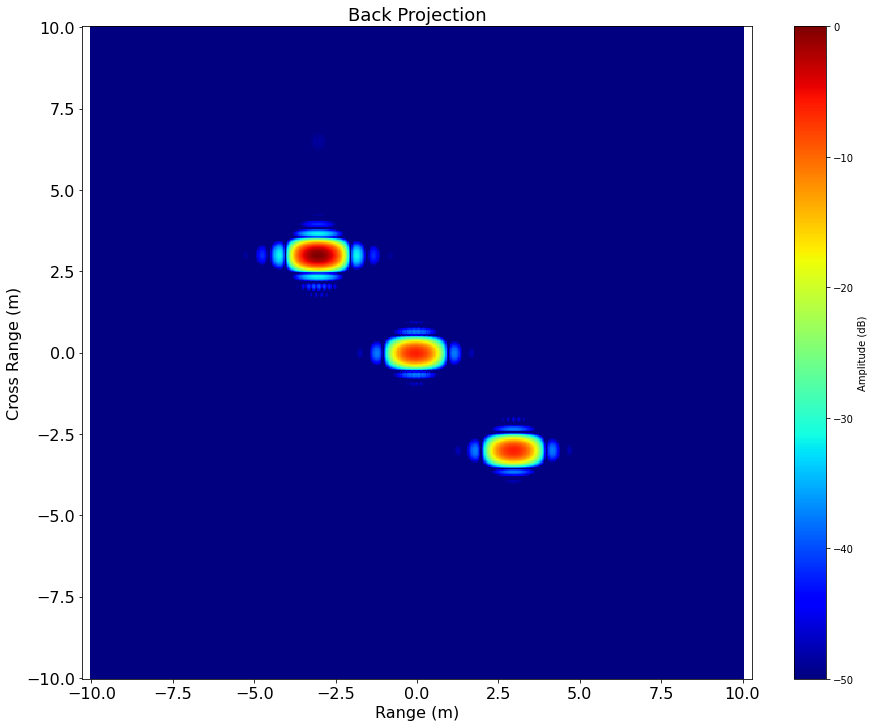

In [19]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 12)



# Plot the backprojected image

plt.figure

plt.pcolor(xi, yi, 20 * np.log10(np.abs(bp_image) / np.max(np.abs(bp_image))), cmap='jet', vmin=-abs(dynamic_range), vmax=0)



# Set the title and labels

plt.title('Back Projection', size=18)

plt.xlabel('Range (m)', size=16)

plt.ylabel('Cross Range (m)', size=16)



# Make the axes equal

plt.axis('equal')



# Set the tick label size

plt.tick_params(labelsize=16)



# Turn on the colorbar and set the label

cbar = plt.colorbar()

cbar.set_label('Amplitude (dB)')



# Show the figure

plt.show()